In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import wrangle

## Acquire Zillow Data

In [2]:
df = wrangle.wrangle_zillow()

Using cached csv


In [3]:
df = wrangle.clean_zillow(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142916 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   bedrooms       float64
 1   bathrooms      float64
 2   finished_sqft  float64
 3   tax_value      float64
 4   yr_built       float64
 5   tax_amount     float64
 6   fips           float64
dtypes: float64(7)
memory usage: 130.8 MB


In [5]:
train, validate, test = wrangle.split_zillow(df)

train shape ==== (1200032, 7)
validate shape = (514300, 7)
test shape ===== (428584, 7)


## 1.) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

### Min-Max Scaler

In [10]:
# Define the scaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler
train['tax_value_scaled'] = scaler.fit_transform(train[['tax_value']])
train.head()

,bedrooms,bathrooms,finished_sqft,tax_value,yr_built,tax_amount,fips,tax_value_scaled
720055,4.0,2.0,1808.0,644683.0,1956.0,7420.14,6059.0,0.007324
89347,4.0,5.0,4227.0,1586297.0,1959.0,18581.16,6037.0,0.018022
1043547,3.0,2.5,1935.0,669762.0,1987.0,6797.76,6059.0,0.007609
1025520,3.0,1.0,1038.0,120120.0,1945.0,2196.53,6037.0,0.001365
1043397,3.0,2.0,1153.0,479891.0,1956.0,4973.04,6059.0,0.005452


*** Do it for all of the categories ***

In [35]:
# Establish "cols" for everything but fips.
cols = ['bedrooms', 'bathrooms', 'finished_sqft', 'tax_value','yr_built',
       'tax_amount']

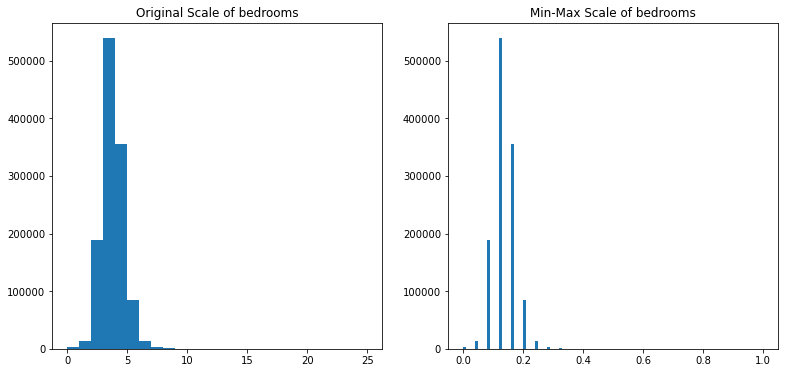

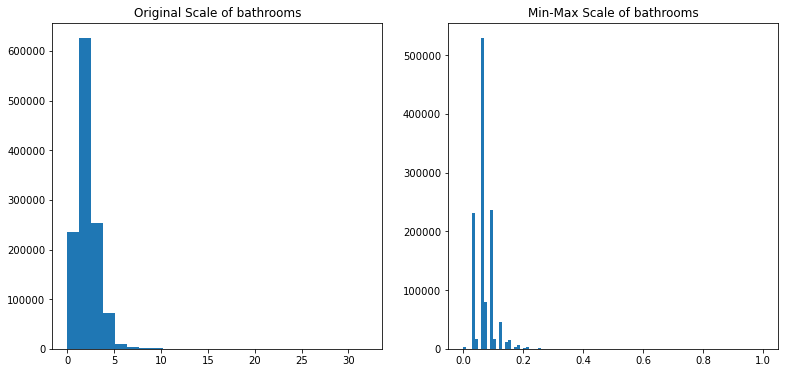

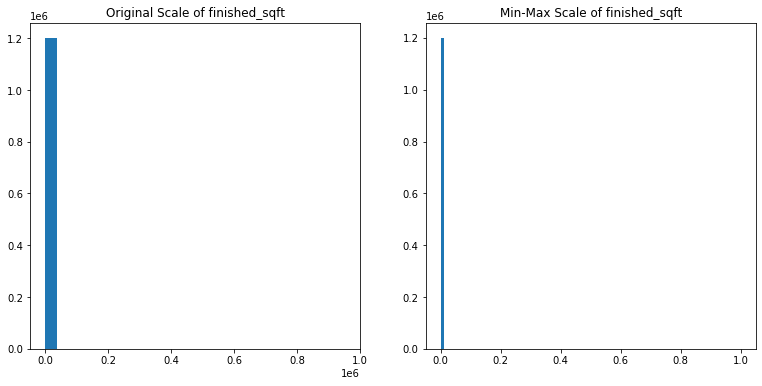

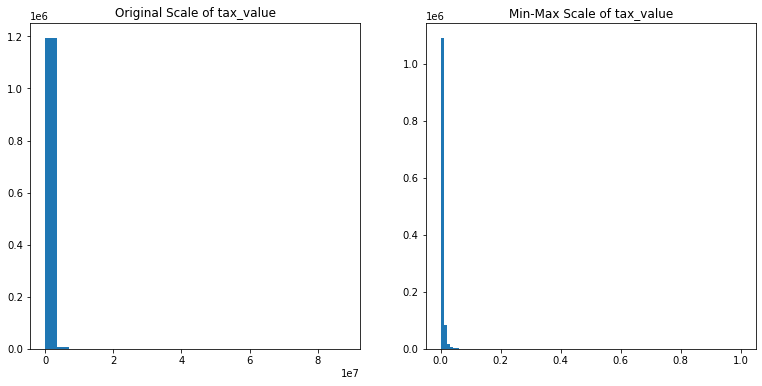

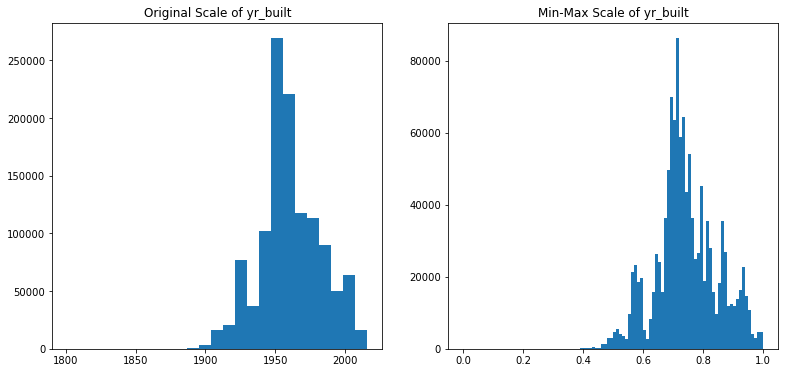

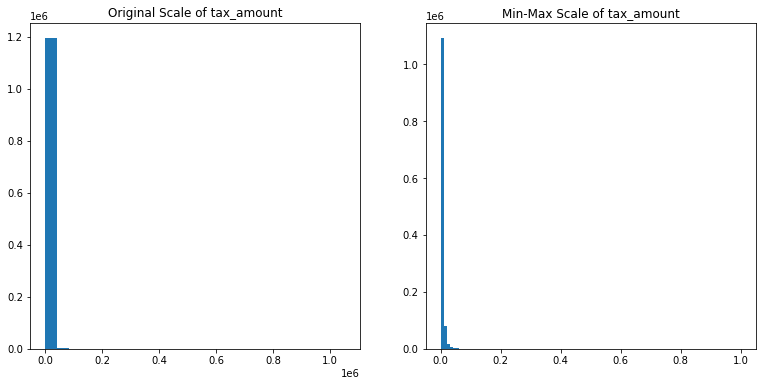

In [47]:
for col in cols:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit_transform(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.show()

### Standard Scaler

In [11]:
# Define the scaler
scaler = sklearn.preprocessing.StandardScaler()

# Fit the scaler
train['tax_value_scaled'] = scaler.fit_transform(train[['tax_value']])
train.head()

,bedrooms,bathrooms,finished_sqft,tax_value,yr_built,tax_amount,fips,tax_value_scaled
720055,4.0,2.0,1808.0,644683.0,1956.0,7420.14,6059.0,0.274132
89347,4.0,5.0,4227.0,1586297.0,1959.0,18581.16,6037.0,1.672880
1043547,3.0,2.5,1935.0,669762.0,1987.0,6797.76,6059.0,0.311386
1025520,3.0,1.0,1038.0,120120.0,1945.0,2196.53,6037.0,-0.505095
1043397,3.0,2.0,1153.0,479891.0,1956.0,4973.04,6059.0,0.029337


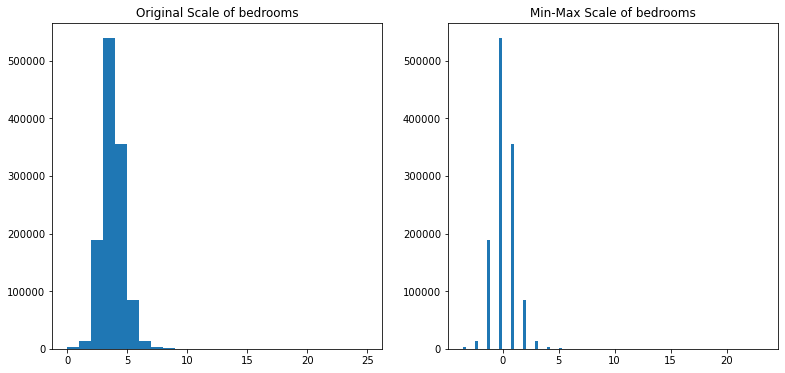

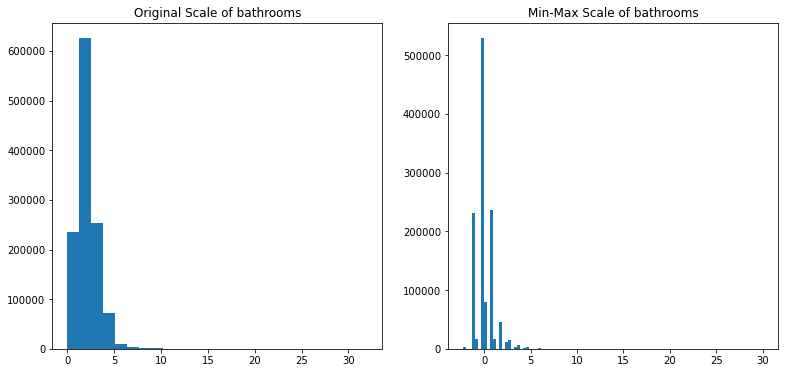

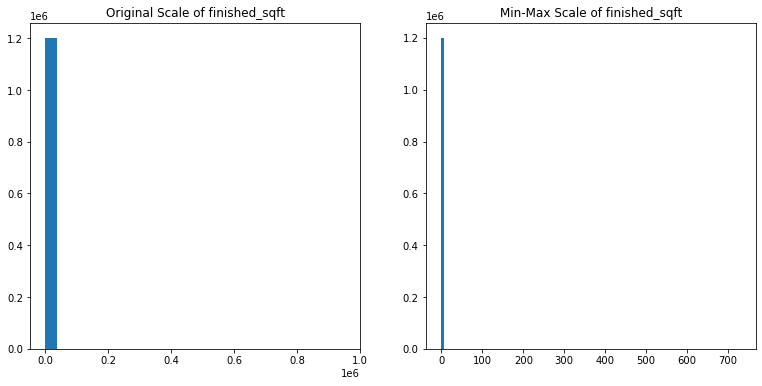

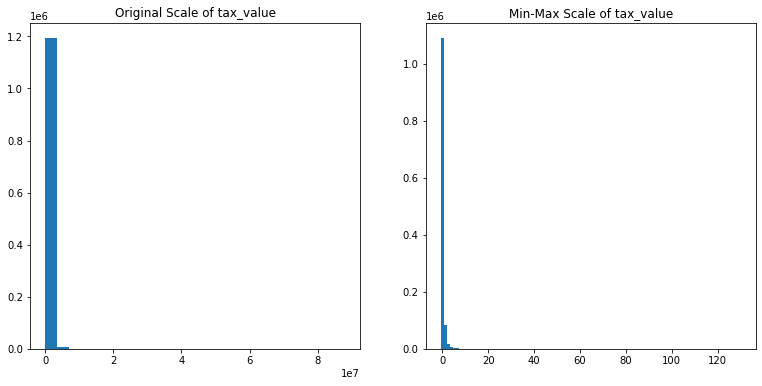

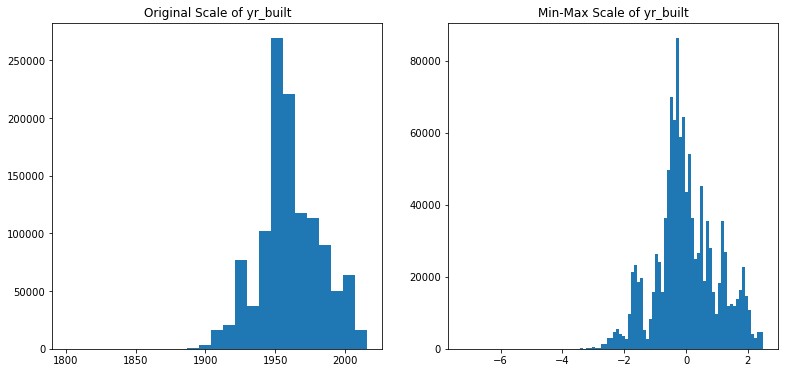

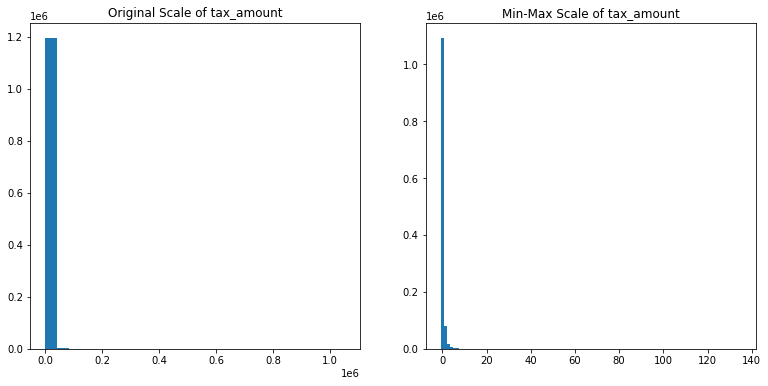

In [48]:
for col in cols:
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit_transform(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.show()

### Robust Scaler

In [12]:
# Define the scaler
scaler = sklearn.preprocessing.RobustScaler()

# Fit the scaler
train['tax_value_scaled'] = scaler.fit_transform(train[['tax_value']])
train.head()

,bedrooms,bathrooms,finished_sqft,tax_value,yr_built,tax_amount,fips,tax_value_scaled
720055,4.0,2.0,1808.0,644683.0,1956.0,7420.14,6059.0,0.917124
89347,4.0,5.0,4227.0,1586297.0,1959.0,18581.16,6037.0,3.644069
1043547,3.0,2.5,1935.0,669762.0,1987.0,6797.76,6059.0,0.989754
1025520,3.0,1.0,1038.0,120120.0,1945.0,2196.53,6037.0,-0.602027
1043397,3.0,2.0,1153.0,479891.0,1956.0,4973.04,6059.0,0.439881


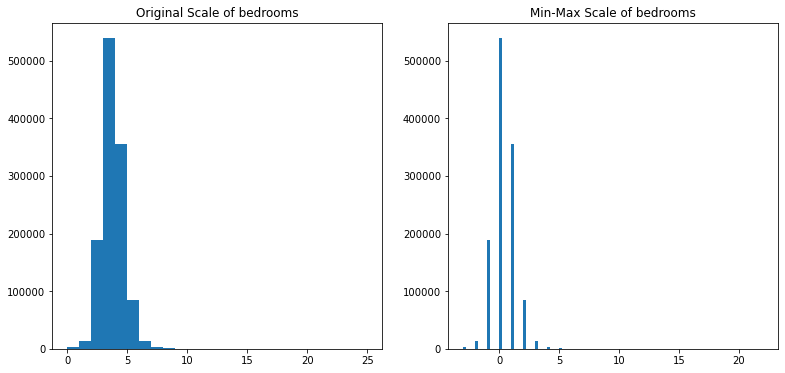

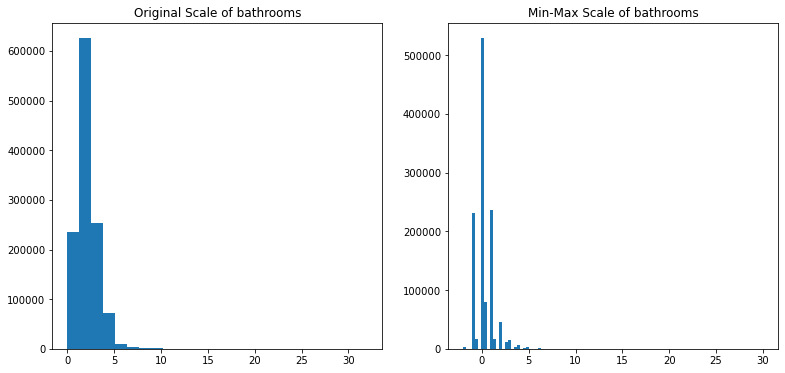

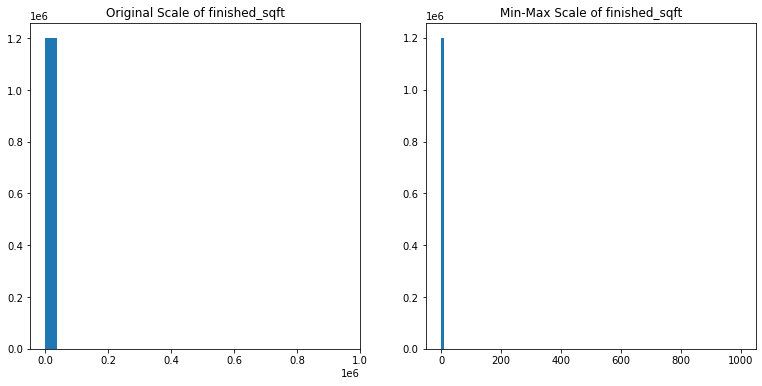

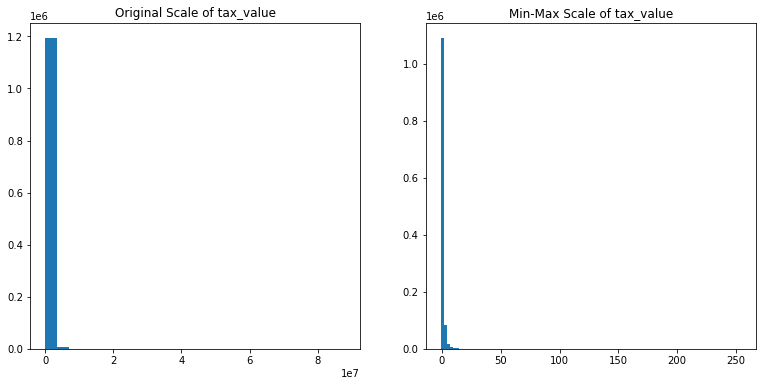

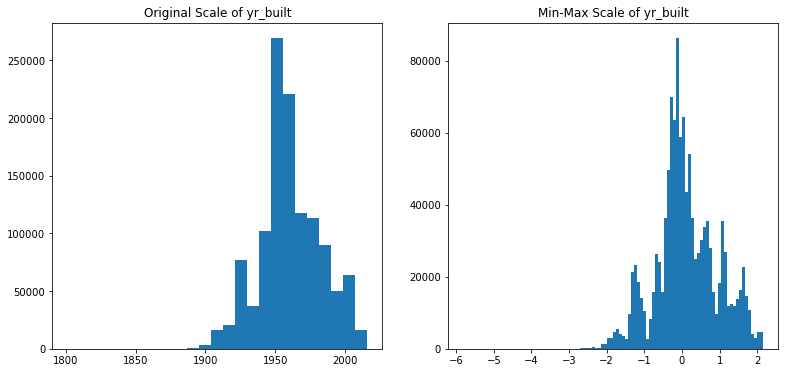

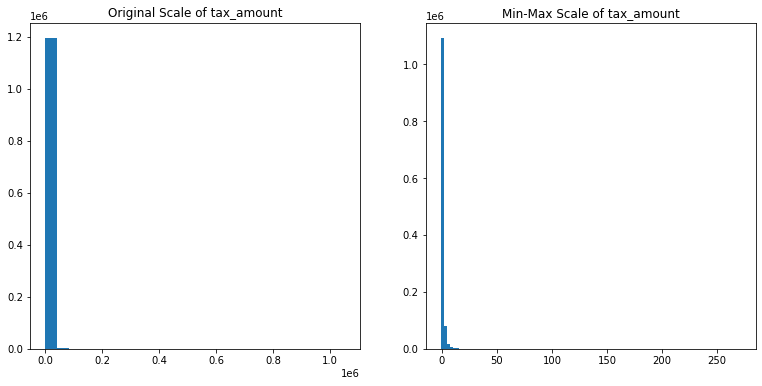

In [49]:
for col in cols:
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit_transform(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.show()

## 2.) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


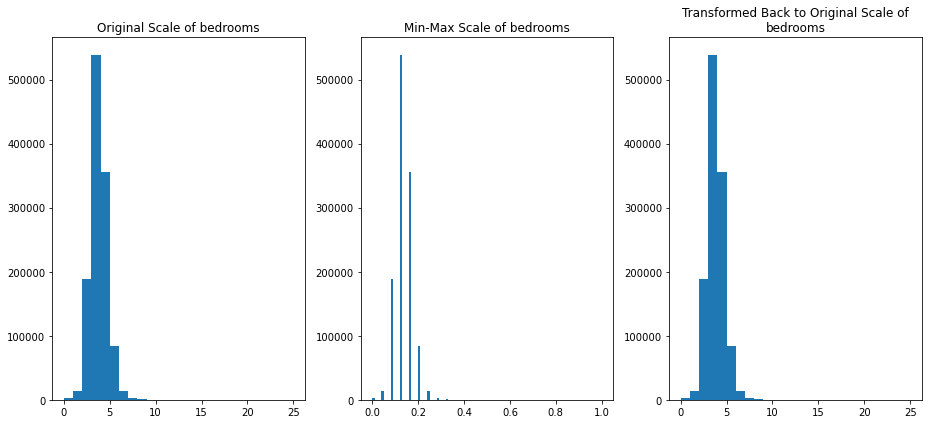

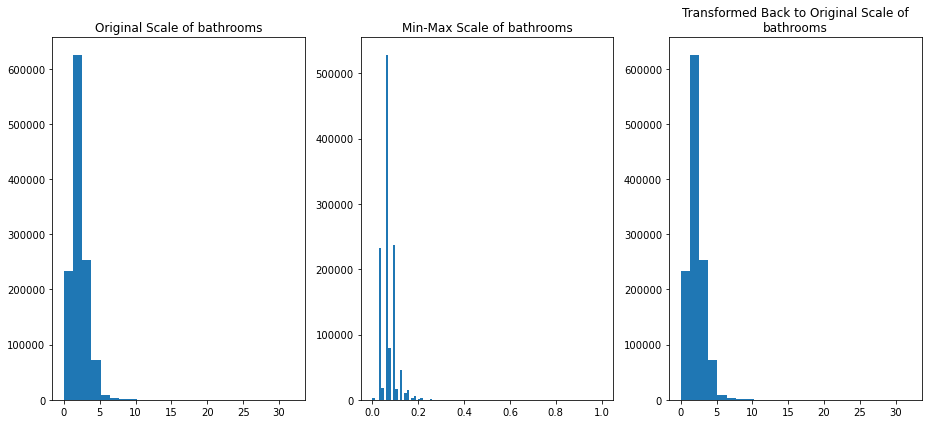

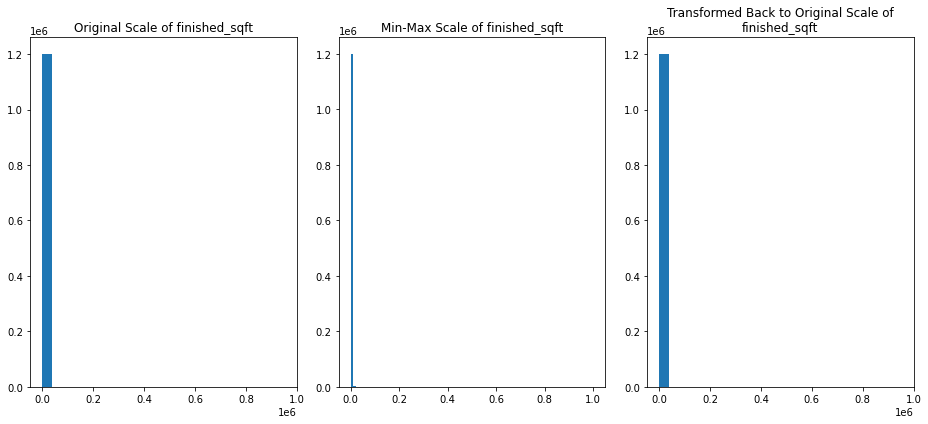

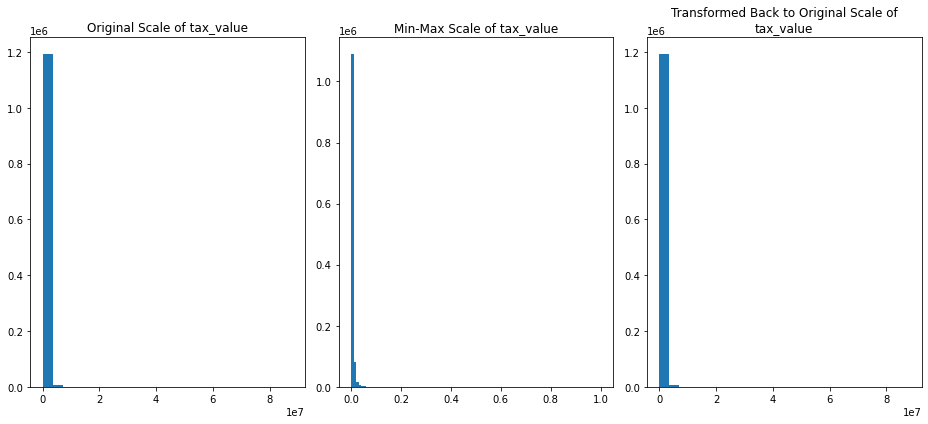

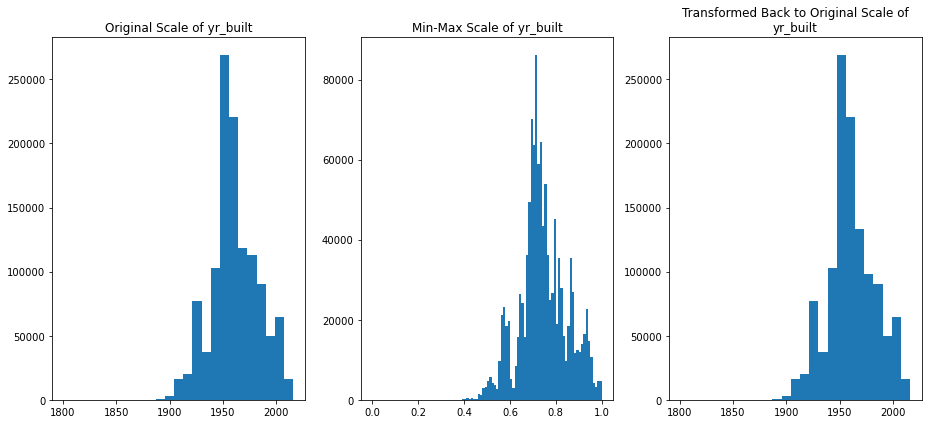

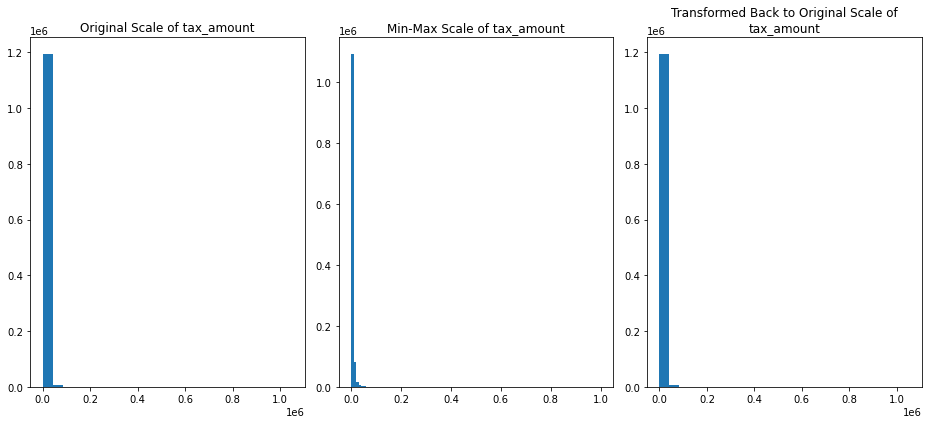

In [50]:
for col in cols:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    inverse_train_scaled = scaler.inverse_transform(train_scaled)
    plt.figure(figsize = (13, 6))
    plt.subplot(131)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(132)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.subplot(133)
    plt.hist(inverse_train_scaled, bins=25)
    plt.title(f'Transformed Back to Original Scale of\n{col}')
    plt.tight_layout()
    plt.show()

## 3.) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

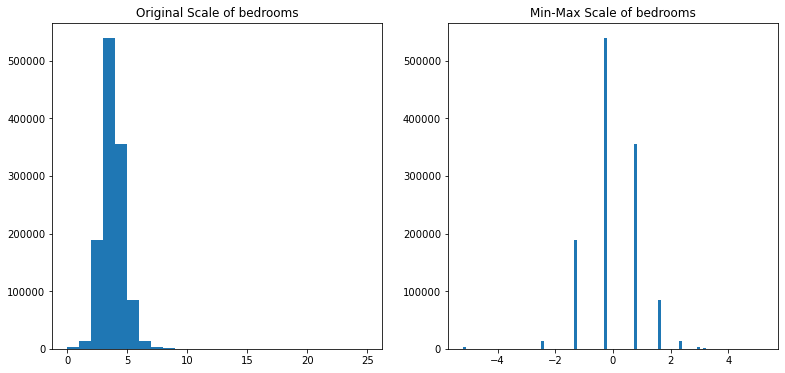

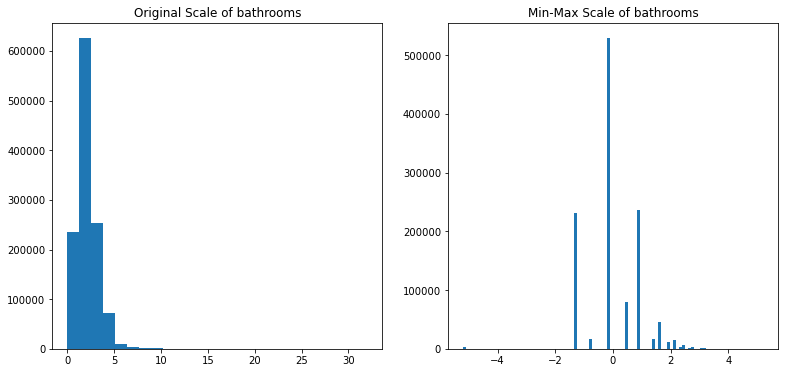

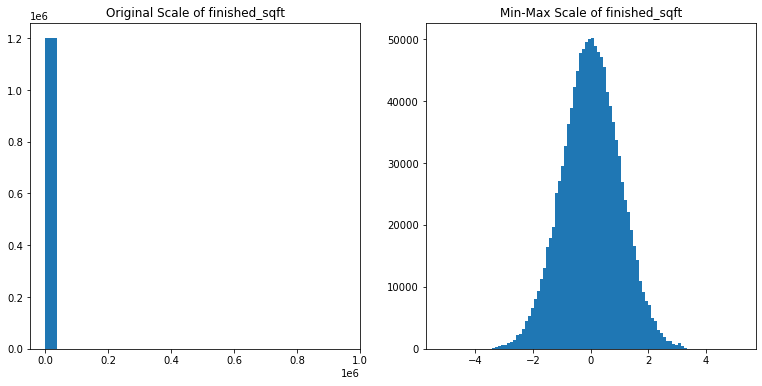

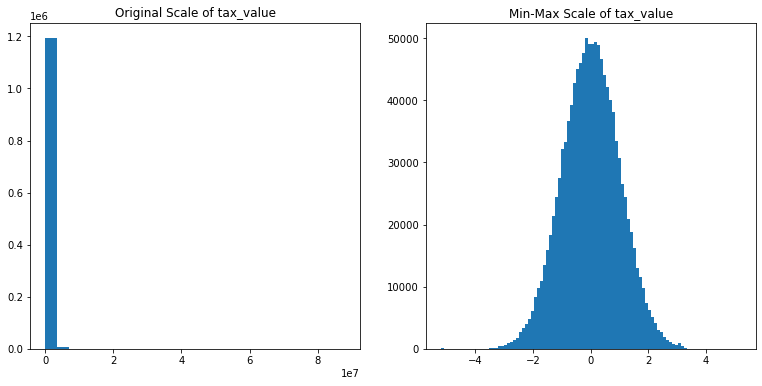

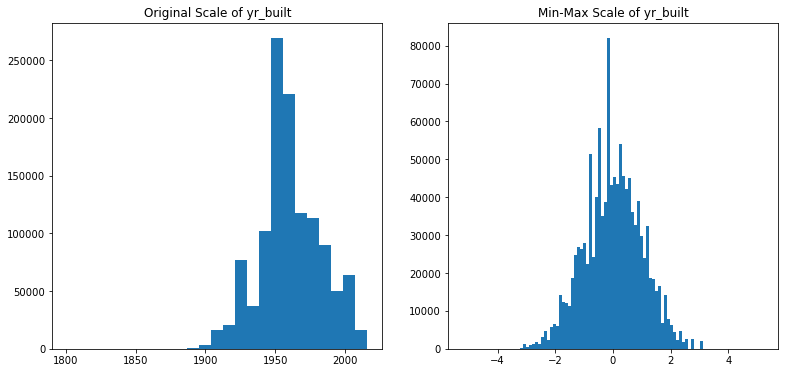

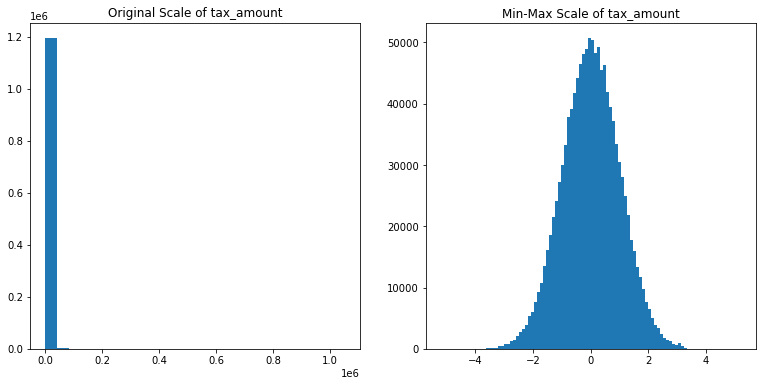

In [57]:
for col in cols:
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler.fit_transform(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.show()

## 4.) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

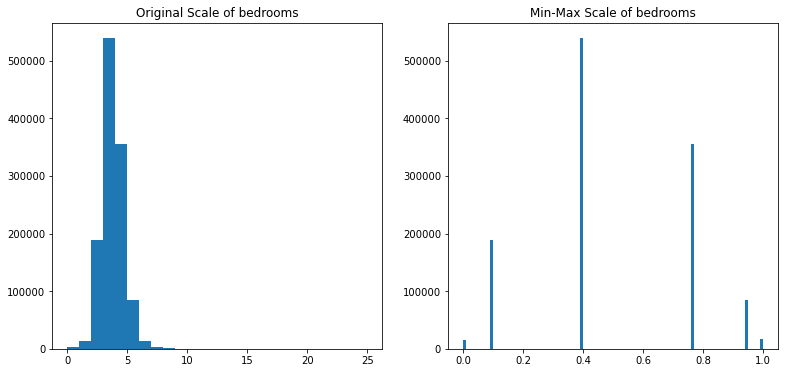

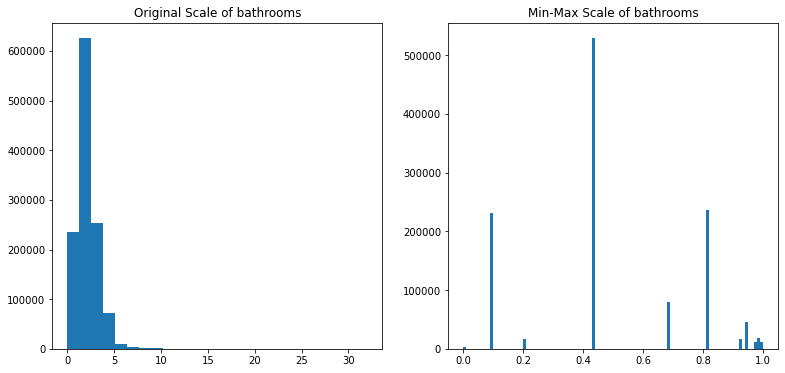

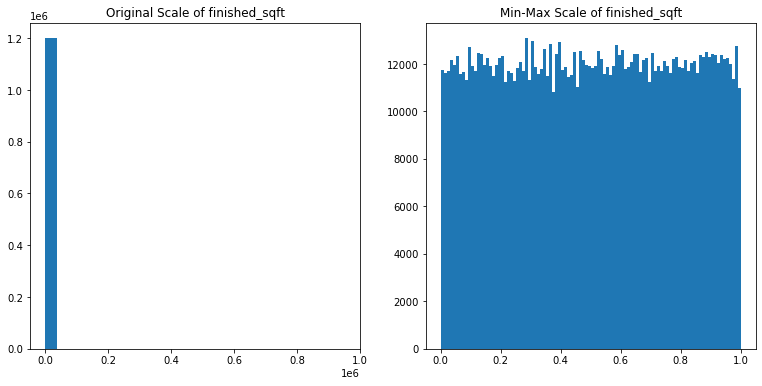

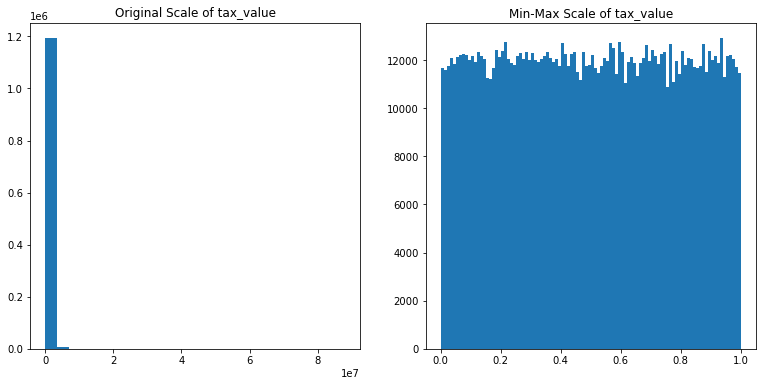

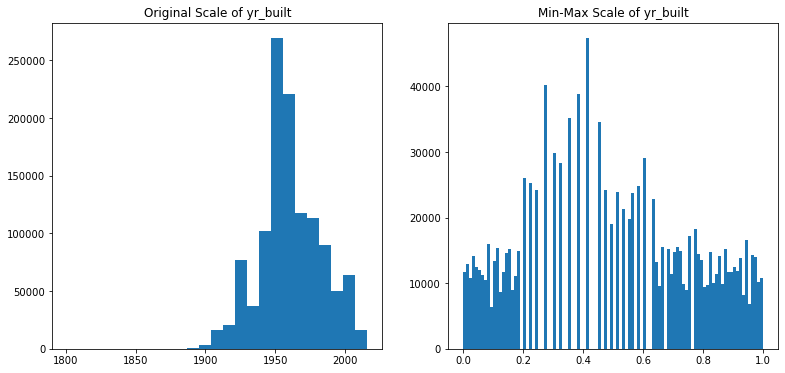

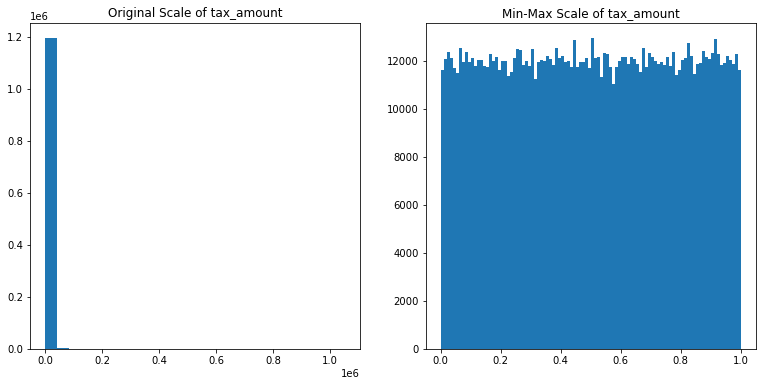

In [58]:
for col in cols:
    scaler = sklearn.preprocessing.QuantileTransformer()
    scaler.fit_transform(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.hist(train[col], bins=25)
    plt.title(f'Original Scale of {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=100)
    plt.title(f'Min-Max Scale of {col}')
    plt.show()

#### No negative numbers numbers but much messier that "output_distribution = normal."

## 5.) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

SyntaxError: invalid syntax (4177314276.py, line 1)